In [1]:
# import findspark
# findspark.init() 

# from pyspark import SparkConf, SparkContext
# from pyspark.sql import SparkSession

# sc = SparkContext(conf=SparkConf().setAppName("MyApp").setMaster("local"))
# spark = SparkSession \
#     .builder \
#     .getOrCreate()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../src/")
from utilities.data_overviewer import data_characterization
from utilities.feature_engineering import  extract_date_features

In [2]:
# train = spark.read.csv("../data/fraudTrain.csv") 
# test = spark.read.csv("../data/fraudTest.csv") 

# train_df = train.toPandas()
# test_df = test.toPandas()

In [3]:
train_df = pd.read_csv("../data/fraudTrain.csv")
data_characterization(train_df)

,Columns_name,Type,Nb_unique_values,Nb_Nan_values,%_Nan_values,Unique_values(value:count),mean,std,min,25%,50%,75%,max
0,Unnamed: 0,int64,1296675,0,0.0,0:1 403054:1 458357:1 456308:1 446067:1 444018:1,648337.0,374317.974488,0.0,324168.5,648337.0,972505.5,1296674.0
1,trans_date_trans_time,object,1274791,0,0.0,2020-06-02 12:47:07:4 2020-06-01 01:37:47:4 20...,-,-,-,-,-,-,-
2,cc_num,int64,983,0,0.0,571365235126:3123 4512828414983801773:3123 367...,417192042079726656.0,1308806447000240384.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0
3,merchant,object,693,0,0.0,fraud_Kilback LLC:4403 fraud_Cormier LLC:3649 ...,-,-,-,-,-,-,-
4,category,object,14,0,0.0,gas_transport:131659 grocery_pos:123638 home:1...,-,-,-,-,-,-,-
5,amt,float64,52928,0,0.0,1.14:542 1.04:538 1.25:535 1.02:533 1.01:523 1...,70.351035,160.316039,1.0,9.65,47.52,83.14,28948.9
6,first,object,352,0,0.0,Christopher:26669 Robert:21667 Jessica:20581 J...,-,-,-,-,-,-,-
7,last,object,481,0,0.0,Smith:28794 Williams:23605 Davis:21910 Johnson...,-,-,-,-,-,-,-
8,gender,object,2,0,0.0,F:709863 M:586812,-,-,-,-,-,-,-
9,street,object,983,0,0.0,864 Reynolds Plains:3123 0069 Robin Brooks Apt...,-,-,-,-,-,-,-


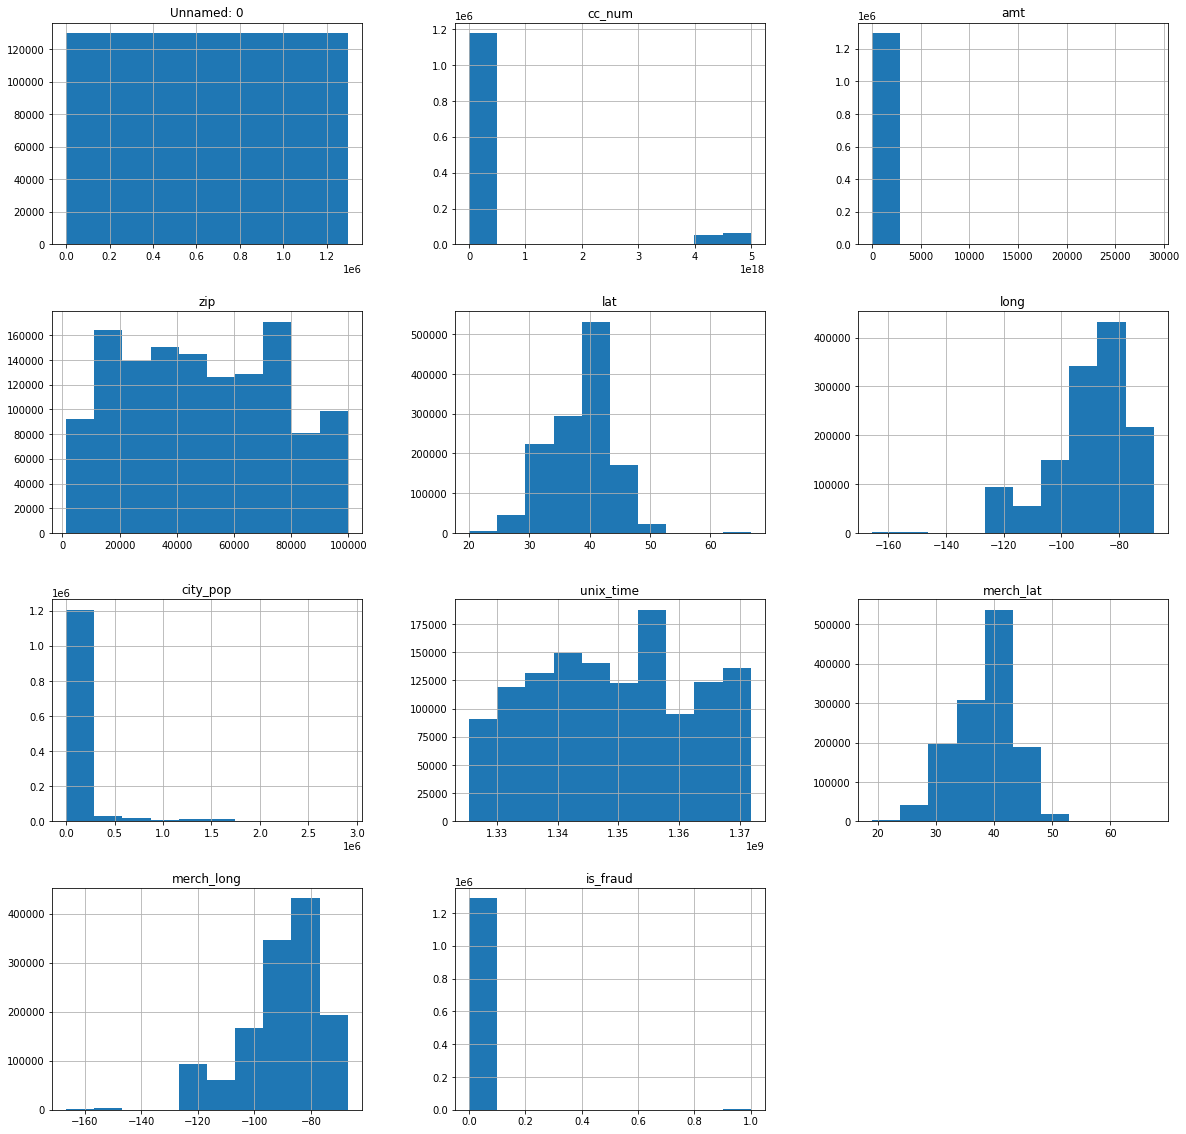

In [ ]:
train_df.hist(figsize=(20,20));

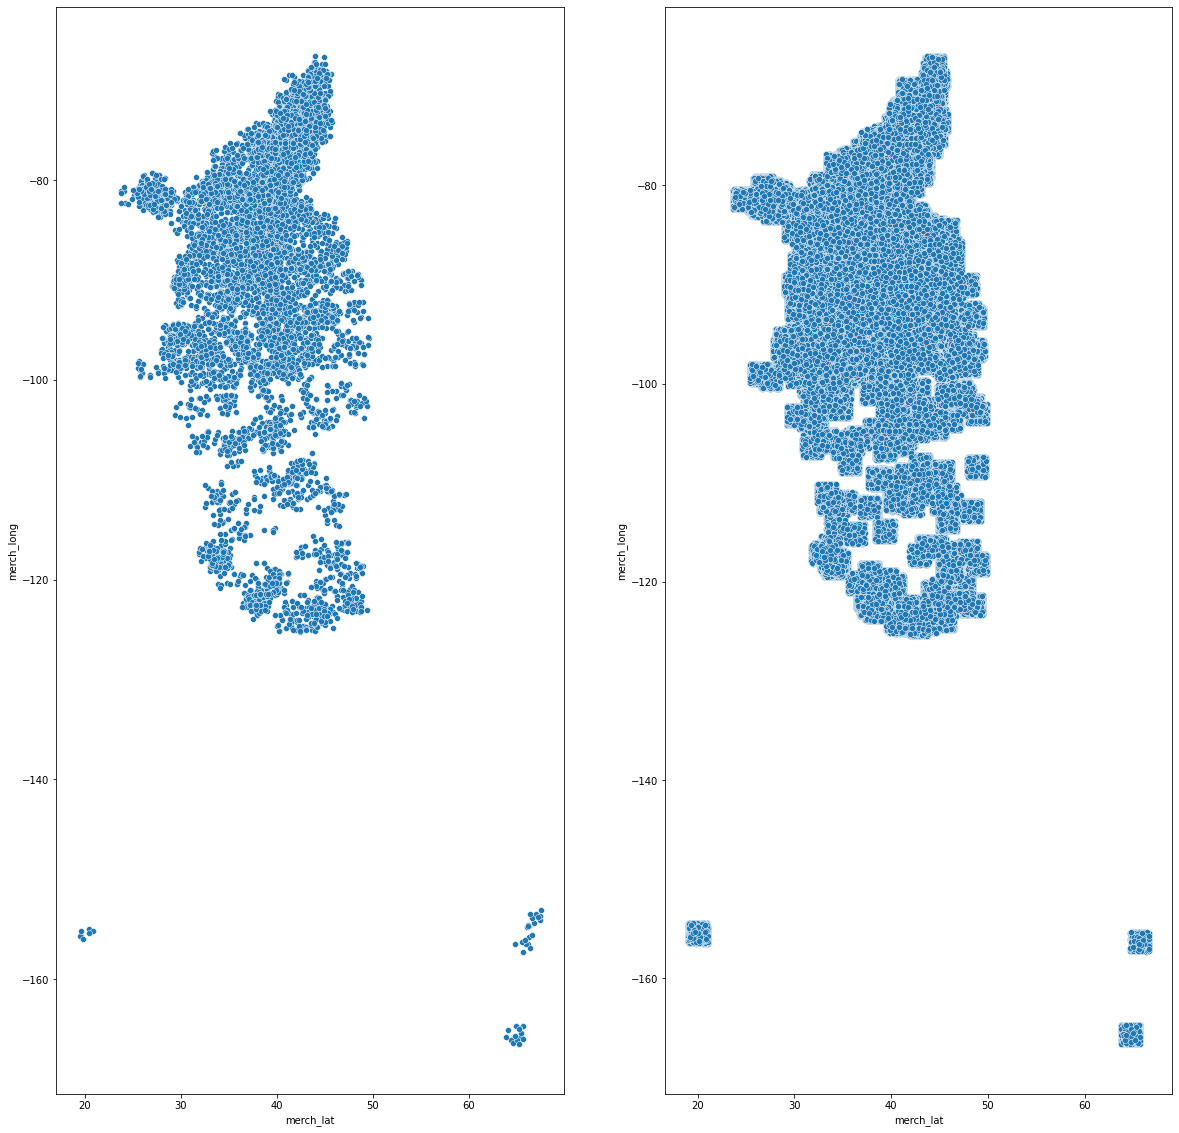

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))
sns.scatterplot(x='merch_lat', y="merch_long", data=train_df[train_df.is_fraud==1], ax=ax[0]);
sns.scatterplot(x='merch_lat', y="merch_long", data=train_df[train_df.is_fraud==0], ax=ax[1]);

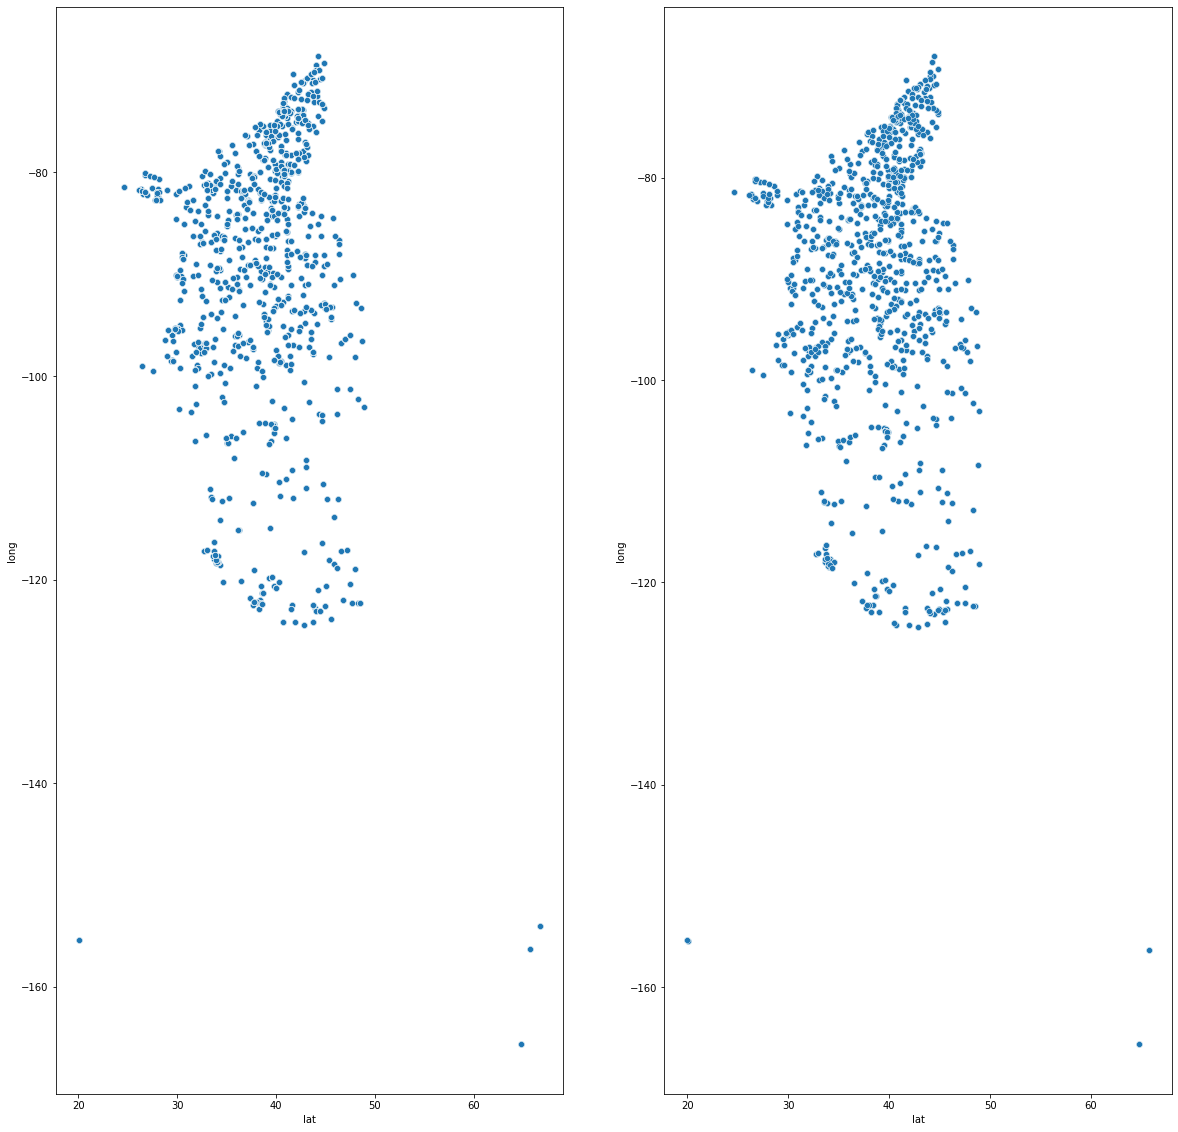

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))
sns.scatterplot(x='lat', y="long", data=train_df[train_df.is_fraud==1], ax=ax[0]);
sns.scatterplot(x='lat', y="long", data=train_df[train_df.is_fraud==0], ax=ax[1]);

In [18]:
train_df["trans_date_trans_time"] = pd.to_datetime(train_df["trans_date_trans_time"], format="%Y-%m-%d %H:%M:%S")

train_df = extract_date_features(train_df, "trans_date_trans_time")

../src\utilities\feature_engineering.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["week"] = df[date_col].dt.week


<AxesSubplot:xlabel='hour', ylabel='count'>

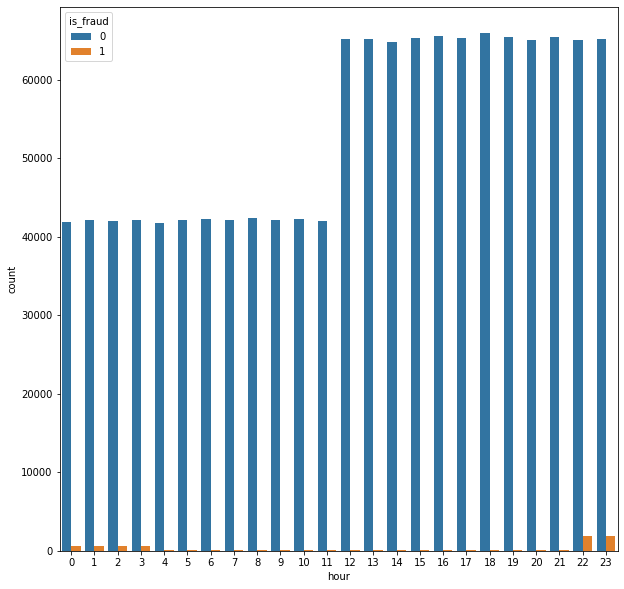

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
sns.countplot(x='hour', data=train_df, hue="is_fraud", ax=ax)

Text(0.5, 1.0, 'Distribution of amout for fraudulent transactions')

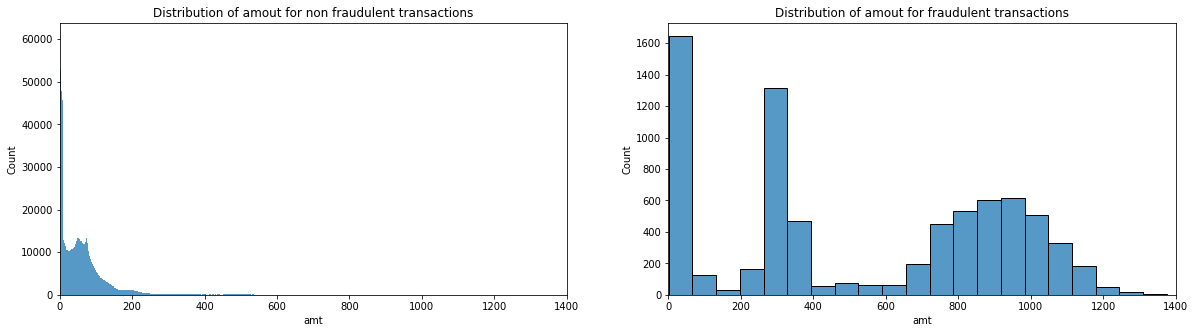

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20,5), sharex=True)
sns.histplot(data=train_df[train_df.is_fraud==0], x="amt", ax=ax[0]).set_title('Distribution of amout for non fraudulent transactions');
plt.xlim(0, 1400);
sns.histplot(data=train_df[train_df.is_fraud==1], x="amt", ax=ax[1]).set_title('Distribution of amout for fraudulent transactions');


In [22]:
train_df["year_month"] = train_df.apply(lambda row: str(row.year)+'_'+str(row.month), axis=1)

<AxesSubplot:xlabel='year_month', ylabel='count'>

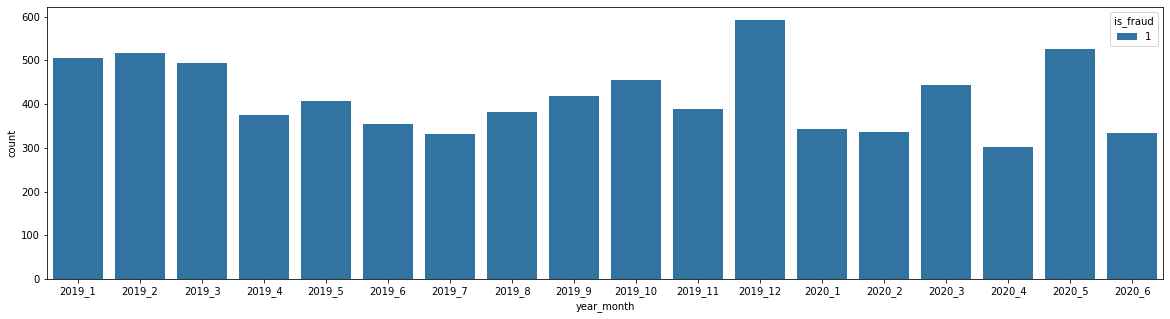

In [37]:
fig, ax = plt.subplots(1, figsize=(20,5))
sns.countplot(x='year_month', hue="is_fraud", data=train_df[train_df.is_fraud==1], ax=ax)

<AxesSubplot:xlabel='category', ylabel='count'>

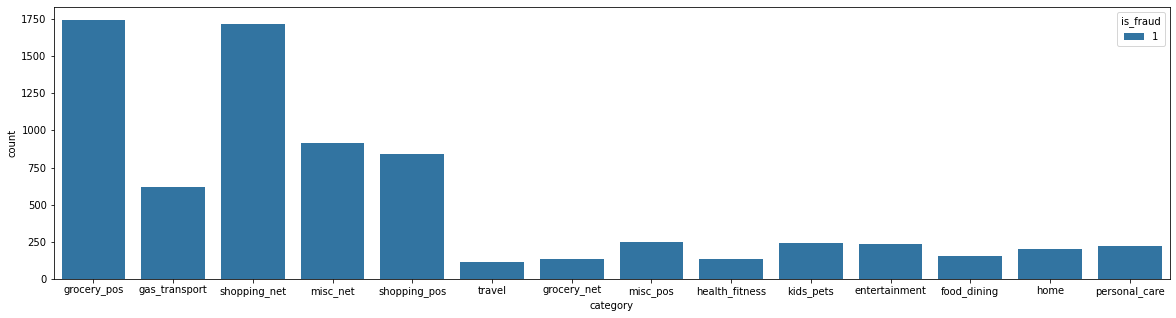

In [45]:
fig, ax = plt.subplots(1, figsize=(20,5))
sns.countplot(x='category', hue="is_fraud", data=train_df[train_df.is_fraud==1], ax=ax)

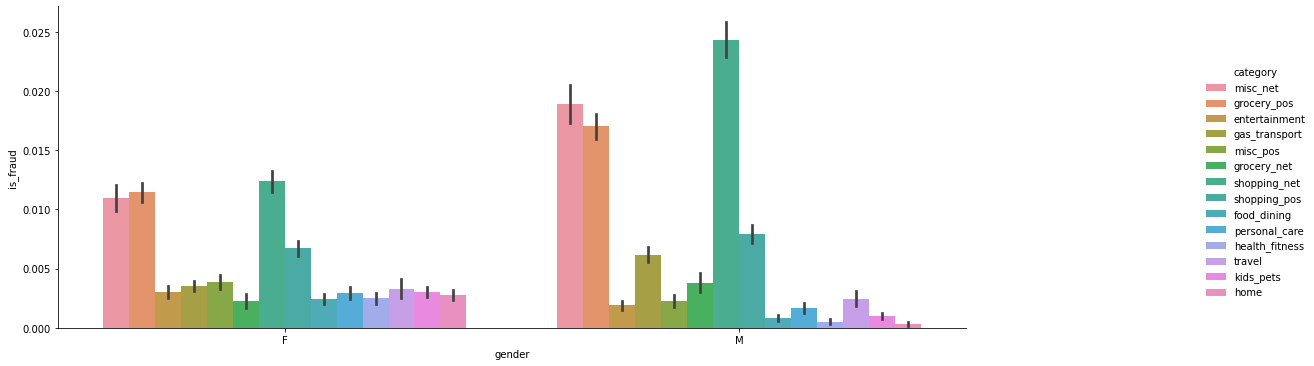

In [59]:
# fig, ax = plt.subplots(1, figsize=(20,5))
g = sns.catplot(x='gender', y='is_fraud', hue="category", data=train_df, kind="bar");
g.fig.set_size_inches(20,5)


In [40]:
train_df.merchant = train_df.apply(lambda x: x["merchant"].split("_")[1], axis=1)